# `multipagetiff` example

In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import multipagetiff as mtif

## load a stack
Load a stack and display its frames.
The stack here is the 3D image of an actin filament imaged with a specle microscope ([M.Pascucci et al. 2019 Nat. Com.](https://www.nature.com/articles/s41467-019-09297-5.pdf?origin=ppub)).

In [3]:
# Load the stack and define the resolution and the units
s = mtif.read_stack("actin_filament.tif", dx=10, dz=50, units='nm')

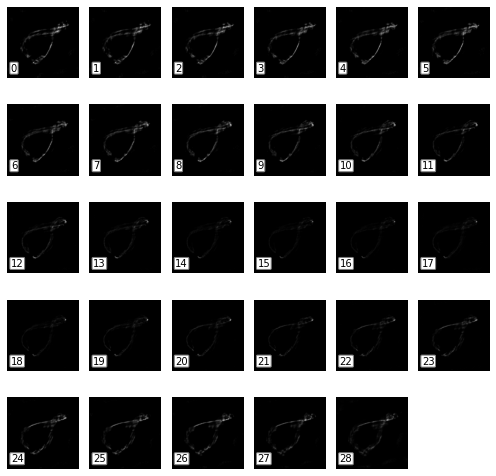

In [4]:
# display the stack
plt.figure(figsize=(7,7))
mtif.plot_pages(s, cmap='gray')

## Stack to and from numpy arays

In [5]:
# To numpy array
pages = s.pages # the stack selection (crop)
pages.shape

(29, 362, 362)

In [6]:
# From numpy array
mtif.Stack(pages)

Multi-Page Stack of 29 pages. (dx=dy=1units, dz=1units, crop=[0, 362, 0, 362]], page limits=[0, 28])

## Other constructors

In [7]:
#copy constructor
s1 = s.copy()

In [8]:
#empty constructor
mtif.empty_like(s)

Multi-Page Stack of 30 pages. (dx=dy=10, dz=50, crop=[0, 362, 0, 362]], page limits=[0, 29])

## Slicing

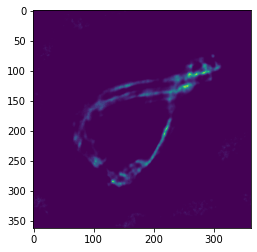

In [9]:
#select one page
page = s[0]
plt.imshow(page);

In [10]:
# slice a range of pages (returns a numpy array)
r = s[2:6]
r.shape

(4, 362, 362)

## Define a selection

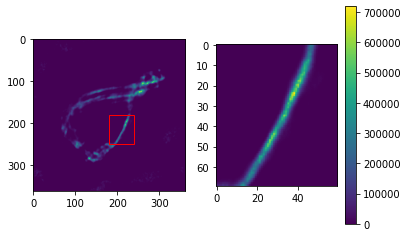

In [11]:
# XY limits
s1 = s.copy()
s1.crop_horizontal = (180,240)
s1.crop_vertical = (180,250)

# Z limits
s1.start_page = 2
s1.end_page = 20

plt.subplot(1,2,1)
mtif.plot_selection(s1)
plt.subplot(1,2,2)
plt.imshow(s1[0])
plt.colorbar()

# Stack Methods

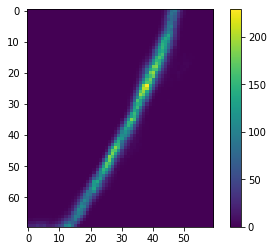

In [25]:
# Normalization
s1.normalize = True # normalize the pages
s1.dtype_out = 'uint8' # convert the pages to this data type after normalization

plt.imshow(s1[0])
plt.colorbar()

# NOTE: the normalization is proper to a selection
# therefore if the selection changes, the normalization is lost

In [26]:
# apply a function to the whole stack
s1.apply(np.max)

255

In [27]:
# apply a function to each page
s1.apply_to_pages(np.max)


[229,
 255,
 237,
 210,
 183,
 163,
 148,
 129,
 144,
 144,
 117,
 98,
 89,
 90,
 79,
 86,
 93,
 88]

In [28]:
# Load the tif stacks specified in the tif_paths list, then applies f to them.
# this function is parallelized.

from glob import glob
tif_paths = glob("*.tif")
results = mtif.load_and_apply_batch(tif_paths, f=np.mean)

Using 6 CPUs: 100%|██████████| 2/2 [00:00<00:00, 30.93it/s]


In [29]:
results

[8143.47, 4.11984375]

# z max-projection

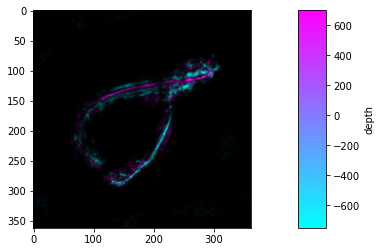

In [61]:
# set the colormap
s = mtif.read_stack("actin_filament.tif", dx=10, dz=50, units='nm')
mtif.set_cmap(plt.cm.cool)
# plot the stack
mtif.plot_flatten(s)

## Refine the image

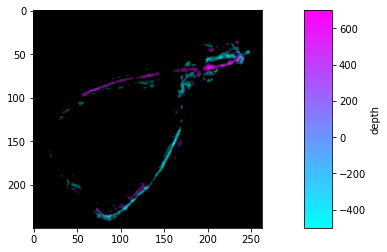

In [62]:
# set XY crop area
s.crop = [50,300,57,320]

# set Z range
s.set_start_in_units(-550)
s.set_end_in_units(700)

# plot with threshold
mtif.plot_flatten(s, threshold=0.25)

---

## Detailed example

In [78]:
st = mtif.read_stack('Stack.tif', title="balls", dx=1, dz=1, z_label='depth', units='mm')
st

Multi-Page Stack "balls" of 4 pages. (dx=dy=1, dz=1, crop=[0, 400, 0, 400]], page limits=[0, 3])

## plot a stack

Plot page by page. The Stack object behaves like a list, which elements are the frames

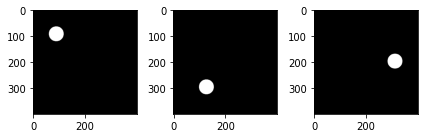

In [79]:
plt.subplot(1,3,1)
plt.imshow(st[0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(st[1], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(st[2], cmap='gray')
plt.tight_layout()

Display the frame of the stack with the plot_frames function

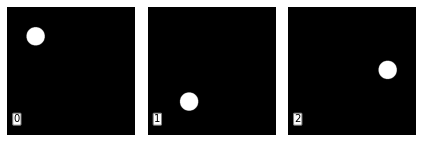

In [82]:
mtif.plot_pages(st, cmap='gray')

## color code

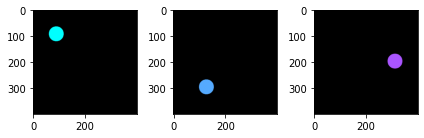

In [89]:
cc = mtif.color_code(st)

plt.subplot(1,3,1)
plt.imshow(cc[0])
plt.subplot(1,3,2)
plt.imshow(cc[1])
plt.subplot(1,3,3)
plt.imshow(cc[2])
plt.tight_layout()

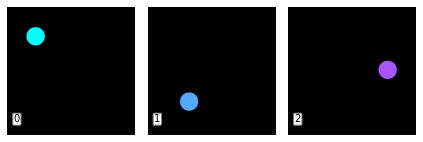

In [92]:
mtif.plot_pages(st, colorcoded=True)

## max projection

Create a color coded RGB image representing frame-depth. The image is the max projection of the color coded stack.

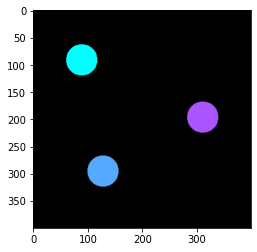

In [95]:
mp = mtif.flatten(st)
plt.imshow(mp);

plot the max projection, together with its colorbar

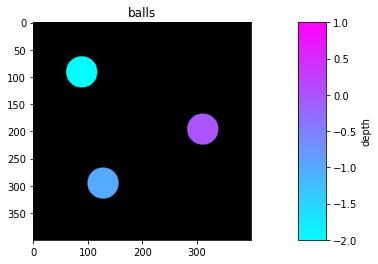

In [97]:
mtif.plot_flatten(st)

## change colormap

Use a matplotlib preset colormap

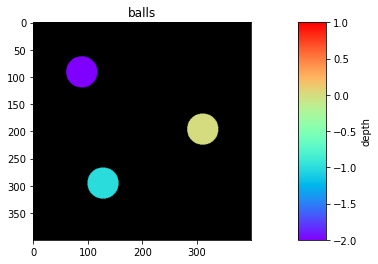

In [102]:
mtif.set_cmap(plt.cm.rainbow)
mtif.plot_flatten(st)

or define you own colormap

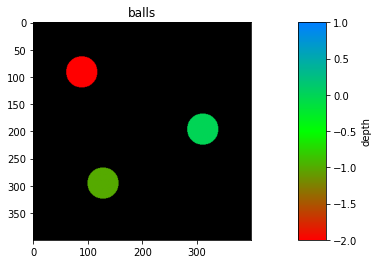

In [104]:
from matplotlib.colors import LinearSegmentedColormap

my_colors = [(1,0,0),(0,1,0),(0.0,0.5,1)]
my_cmap = LinearSegmentedColormap.from_list("myCmap", my_colors, N=256)
mtif.set_cmap(my_cmap)
mtif.plot_flatten(st)